<img style="float: right; margin: 0px 0px 15px 15px;"
src="MontecarloImag.jpeg" width="300px" height="100px" />
# Técnicas de reducción de varianza

**Objetivos:**
1. Estudiar el método de integración montecarlos para aproximación de integrales.
2. Estudiar dos técnicas para reducción de varianza
   - Muestreo estratificado
   - Método de números aleatorios complementarios


## 1. Integración numérica Montecarlo

En esta clase veremos una técnica alternativa de integración numérica (métodos numéricos): Integración Montecarlo

### Introducción

En matempaticas financieras un problema frecuente es el valuar instrumentos financieros cuyos rendimientos son aleatorios. Por ejemplo los instrumentos de renta variable, las inversiones en la bolsa o los derivados, cuyos rendimientos dependen del comportamiento de una acción o de un bien como el oro o el petróleo. La valuación de estos instrumentos se reduce, al cálculo de una esperanza de una función continua de una variable aleatoria.

Recordando algunos conceptos de probabilidad. Sea **$x$ una variable aleatoria continua**, si su función de densidad de probabilidad es $f(x)$, en un intervalo $[\alpha,\beta]$, entonces

$$ P(X\leq c) = \int_\alpha^c f(x) dx$$

$$ \textbf{Esperanza}\rightarrow E(g(x))=\int_\alpha^\beta g(x)f(x) dx $$
$$ \textbf{Varianza}\rightarrow Var(g(x))=E(g(x)^2)-E(g(x))^2=\int_\alpha^\beta g(x)^2f(x) dx -E(x)^2$$

Con frecuencia no es posible aplicar un método de integración para calcular en forma exacta la integral. En ese caso hay que aproximar la integral por medio de un método de integración numérico o por monte carlo. 

## Método monte carlo

Se sabe por la Ley de los Grandes Números que un buen estimador del valor esperado de una variable aleatoria continua $X$ con distribución $F$ es el valor promedio de una muestra finita de variables aleatorias, independientes con distribución $F$: Es decir
$$ E(X)\approx \frac{1}{M}\sum_{i=1}^M X_i$$

Como la esperanza de una variable aleatoria continua es una integral, la media muestral se puede usar para estimar el valor de una integral. Esta es la idea que está detrás del método de Monte-Carlo.

Esta idea se puede generalizar para estimar el valor esperado de una función $G$ continua cuyo argumento es una variable aleatoria con distribución $F$: Si se tiene una muestra de variables aleatorias, independientes, idénticamente distribuidas con distribución $F$; entonces

$$ E(G(X))\approx \frac{1}{M}\sum_{i=1}^M G(X_i)$$

### Aplicación al cálculo de integrales

En el caso de interés, se desea estimar la integral de una función $G$ continua, esta integral puede verse como el cálculo del valor esperado de la función $G$ cuando se aplica a una variable aleatoria con distribución uniforme. Supongamos que el intervalo de integración es $[0, 1]$ y sea $x_1, x_2, \cdots, x_M$ una muestra de variables aleatorias, independientes
con distribución uniforme en el intervalo $[0, 1]$ entonces:

$$ \int_0^1G(x)dx = E(G(x)) \approx \frac{1}{M}\sum_{i=1}^M G(X_i)$$

** Todo el problema se reduce a generar la muestra**.

Por otro lado observe que toda integral en el intervalo $[a,b]$ se puede transformar a una integral sobre el intervalo $[0,1]$, con el siguiente cambio de variable $u = \frac{x-a}{b-a} \rightarrow x = a+(b-a)u$ con $dx=(b-a)du$, entonces

$\int_a^b G(x)dx= (b-a)\int\limits_0^1 G(a+(b-a)u)du\approx \frac{(b-a)}{M}\sum\limits_{i=1}^M G(\underbrace{a+(b-a)u_i}_{variable \ U\sim[a,b]})$

con $u_i$ variables aleatorias uniformes en el intervalo $[0,1]$

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- los números aleatorios distribuidos uniformemente entre $[a,b]$,

y que devuelva la aproximación montecarlo de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [3]:
# Integración montecarlo
def int_montecarlo(f, a, b, U):
    return (b-a)/len(U)*np.sum(f(U))

### Ejemplo 

Aproxime el valor de la siguiente integral usando el método monte carlo

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

In [8]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Valor_aproximacion', 'Error_relativo%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Valor_aproximacion"] = I_m
df.loc[N,"Error_relativo%"] = np.abs(df.loc[N,"Valor_aproximacion"]-I)*100/I
df

,Valor_aproximacion,Error_relativo%
Cantidad_terminos,,
10,0.184707,44.587911
100,0.382359,14.707592
1000,0.327014,1.895805
10000,0.332879,0.136307
100000,0.334754,0.426254
1000000,0.333574,0.072342
10000000,0.333247,0.025920


### Nota:
Sean $I=E(g(x))$ y el estimado de $I$ es $\tilde I_M = \frac{1}{M}\sum\limits_{i=1}^M g(X_i)$. Tome $\sigma$ como la desviación estándar de $g(X)$ y $\tilde \sigma$ como la desviación estándar muestral. Por lo tanto, se tiene entonces que:

$$ Var(\tilde I_M)=\frac{\sigma^2}{M} \longrightarrow std(\tilde I_M)=\frac{\sigma}{\sqrt{M}}$$

Típicamente no se tiene conocimiento de $\sigma$ por lo tanto se puede estimar por medio de la varianza muestral.
$$\tilde \sigma^2=\frac{1}{M-1}\sum\limits_{i=1}^{M}(g(X_i)-\tilde I_M)^2$$

### Conclusión 

Si se desea disminuir el error de estimación de la integral (desviación estándar), hay dos caminos:
   1. Aumentar la cantidad de muestras a evaluar en la función, **(Proceso lento)**, o
   2. Utilizar técnicas para disminuir la varianza.

# 2. Reducción de varianza

## a. Muestreo estratificado

La idea radica en la observación de que la población puede ser **heterogénea** y consta de varios subgrupos homogéneos (como género, raza, estado económico social). Si deseamos aprender sobre toda la población (como por ejemplo, si a la gente en México le gustaría votar para las elecciones en 2018), podemos tomar una muestra aleatoria de toda la población para estimar esa cantidad. Por otro lado, sería más eficiente tomar muestras pequeñas de cada subgrupo y combinar las estimaciones en cada subgrupo según la fracción de la población representada por el subgrupo. Dado que podemos conocer la opinión de un subgrupo homogéneo con un tamaño de muestra relativamente pequeño, este procedimiento de muestreo estratificado sería más eficiente.

Si nosotros deseamos estimar $E(X)$, donde $X$ depende de una variable aleatoria $S$ que toma uno de los valores en $\{1, ...,k\}$ con probabilidades conocidas, entonces la técnica de estratificación se ejecuta en k grupos, con el i-ésimo grupo que tiene $S = i$, tomando $\bar X_i$ es el valor promedio de $X$ cuando se estuvo en el grupo $S = i$, y luego se estima $E(x)$ por:
$$E(x)=\sum\limits_{i=1}^{k}\underbrace{E(X|S=i)}_{\text{media muestral del i-ésimo grupo}}P(S=i)=\sum\limits_{i=1}^{k} \bar X_i P(S=i)$$

Para ilustrar considere que queremos estimar $E(g(U))=\int_0^1g(x)dx$. Para esto vamos a considerar dos estimadores basados en una muestra de 2n corridas.

1.**Método estándar (visto anteriormente)**
$$\textbf{media}\rightarrow \hat g=\frac{1}{2n}\sum\limits_{i=1}^{2n} g(U_i)$$

$$\textbf{varianza}\rightarrow Var(\hat g)=\frac{1}{4n^2}\sum\limits_{i=1}^{2n} Var(g(U_i))=\frac{1}{2n}\bigg[\int_0^1g^2(x)dx-\bigg(\int_0^1g(x)dx\bigg)^2\bigg]$$
Por otro lado nosotros podemos escribir

$$E(g(U))=\int_0^{1/2}g(x)dx + \int_{1/2}^1g(x)dx$$

   - Seleccionamos $n$ U's de $[0,1/2]$
   - Seleccionamos $n$ U's de $[1/2,1]$
   
2.Con esta nueva selección construimos el **estimador estratificado**:

$$\textbf{media}\rightarrow \hat g_s=\frac{1}{2n}\big[\sum\limits_{i=1}^{n} g(\underbrace{U_i/2}_{U\sim [0,1/2]}) + \sum\limits_{i=n+1}^{2n} g\big((\underbrace{U_i+1)/2}_{U\sim [1/2,1]}\big)\big]$$

$$\textbf{varianza}\rightarrow Var(\hat g_s)=\frac{1}{4n^2}\big[\sum\limits_{i=1}^{n} Var(g(U_i/2)) + \sum\limits_{i=n+1}^{2n} Var(g\big((U_i+1)/2\big))\big]$$

Realizando el cálculo directo tomando $U_i\sim U(0,1)$, se puede mostrar que:

$$Var(g(U_i/2)) = 2 \int_0^{1/2} g^2(x)dx - 4m_1^2,$$
$$Var(g((U_i+1)/2)) = 2 \int_{1/2}^1 g^2(x)dx - 4m_2^2,$$

donde $m_1 = \int_0^{1/2}g(x)dx$ y $m_2 = \int_{1/2}^1g(x)dx$

Realizando varias manipulaciones algebraicas se llega a que 

> $$Var(\hat g_s) = Var(\hat g)-\frac{1}{2n}(m_1-m_2)^2$$

<font color ='red'> La varianza se disminuye con respecto a $Var(\hat g)$

> **Referencia**: Handbook in Monte Carlo simulation applications in financial engineering, risk management, and economics, pág. 97.

### Ejemplo
Como ilustración de la estratificación, considere la simulación de números aleatorios normales estándar mediante el método estándar y el método de estratificación, respectivamente.

In [18]:
np.random.seed(5555)
# Muestras
N = 500
muestras = np.random.normal(np.random.rand(N))

# Cálculo de media
t1 = time.time()
g_hat = (sum(muestras))/len(muestras)
t2 = time.time()
print('media 1=',t2-t1)

t1 = time.time()
g_hat2 = np.mean(muestras)
t2 = time.time()
print('media 2=',t2-t1)

# cálculo de la varianza
t1 = time.time()
# varg_hat = sum(list(map(lambda l:l**2,muestras-g_hat)))/len(muestras)
varg_hat = np.mean(list(map(lambda l:l**2,muestras-g_hat)))
t2 = time.time()
print('varianza 1=',t2-t1)

t1 = time.time()
var_numpy = np.var(muestras)
t2 = time.time()
print('varianza 2=',t2-t1)

print('creada:',varg_hat,'numpy:',var_numpy)


media 1= 0.0
media 2= 0.0
varianza 1= 0.0
varianza 2= 0.0
creada: 1.10073002784 numpy: 1.10073002784


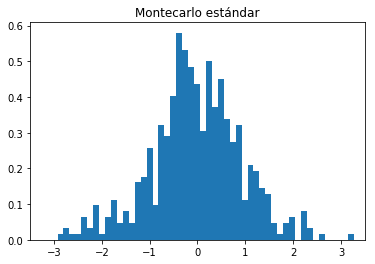

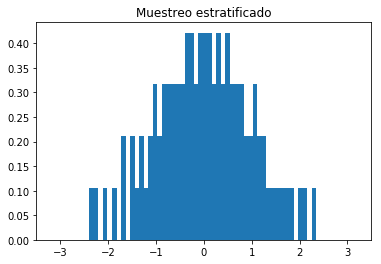

In [10]:
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N))
plt.hist(montecarlo_standar,50,normed=True)
plt.title('Montecarlo estándar')
plt.xlim((-3.5,3.5))
plt.show()

# Método muestreo estratificado (B estratos)
B = 100
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.norm.ppf(v)

plt.hist(m_estratificado,50,normed=True)
plt.title('Muestreo estratificado')
plt.xlim((-3.5,3.5))
plt.show()

### Ejemplo
Estimar la media de la siguiente función de distribución de  exponencial:
$$\textbf{Densidad}\rightarrow f(x)=e^{-x}\rightarrow \text{media = 1}$$
$$\textbf{Acumulada}\rightarrow F(x)=1-e^{-x}$$

Usando el método de la transformada inversa que realizamos en clases pasadas, obtuvimos que para generar números aleatorios de esta distribución tenía que aplicarse $x_i=-ln(u_i)$ con $u_i \sim U[0,1]$.

Suponga entonces que generamos 10 muestras y con eso intentamos estimar la media de esta función de distribución, como se muestra a continuación:

In [87]:
np.random.seed(55555)
ui = np.random.rand(10)
i = [i for i in range(1,11)]

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index= i,columns=['Numero_Aleatorio', 'Observacion_generada','Media_muestral'], dtype='float')
df.index.name = "Cantidad_terminos"

xi = -np.log(ui)

media_no_estrato = np.mean(xi)
# Mostramos los resultados en la tabla previamente creada
df.loc[len(i),"Media_muestral"] ='Media muestral = %f'%media_no_estrato
df.loc[i,"Numero_Aleatorio"] = ui
df.loc[i,"Observacion_generada"] = xi
# print('La media de la muestra es=',np.mean(xi)
df


,Numero_Aleatorio,Observacion_generada,Media_muestral
Cantidad_terminos,,,
1,0.129104,2.047133,NaN
2,0.872152,0.136791,NaN
3,0.795504,0.228780,NaN
4,0.878771,0.129231,NaN
5,0.449543,0.799523,NaN
6,0.575340,0.552795,NaN
7,0.829415,0.187034,NaN
8,0.873115,0.135688,NaN
9,0.140971,1.959203,NaN


### Usando muestreo estratificado

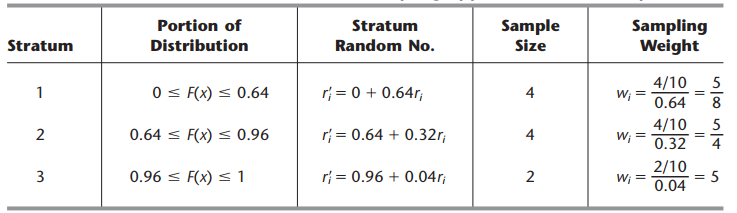

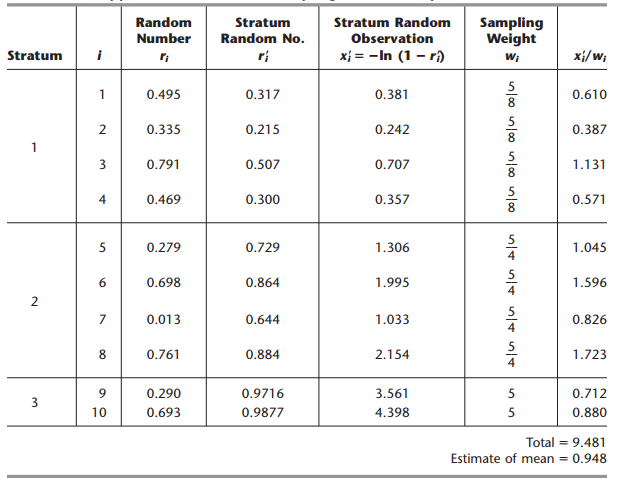

In [85]:
np.random.seed(555555)
r1 = np.random.uniform(0,0.64,4)
r2 = np.random.uniform(0.64,0.96,4)
r3 = np.random.uniform(0.96,1,2)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [5/8,5/4,5]
xi = list(map(lambda r:-np.log(r),r))
muestras = np.concatenate([(xi[i]/w[i]).tolist() for i in m])

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index= i,columns=['Numero_Aleatorio_Estrato','Observacion_generada','xi/w'], dtype='float')
df.index.name = "términos"

i = [i for i in range(1,11)]
# Mostramos los resultados en la tabla previamente creada
df.loc[i,"Numero_Aleatorio_Estrato"] = np.concatenate(r)
df.loc[i,"Observacion_generada"] = np.concatenate(xi)
df.loc[i,"xi/w"] = muestras
# print('La media de la muestra es=',np.mean(xi)
df

,Numero_Aleatorio_Estrato,Observacion_generada,xi/w
términos,,,
1,0.579751,0.545157,0.872250
2,0.276113,1.286946,2.059114
3,0.538485,0.618995,0.990392
4,0.057293,2.859568,4.575309
5,0.944662,0.056929,0.045543
6,0.784803,0.242322,0.193858
7,0.839425,0.175038,0.140030
8,0.682494,0.382001,0.305601
9,0.984360,0.015763,0.003153


In [90]:
media_estrato = np.mean(muestras)
print('La media muestral estimada método estratificado es    = ',media_estrato)
print('La media muestral estimada método no estratificado es = ',media_no_estrato)
print('Error relativo método estratificado    = ',(1-media_estrato)*100)
print('Error relativo método no estratificado = ',(1-media_no_estrato)*100)

La media muestral estimada método estratificado es    =  0.918574617391
La media muestral estimada método no estratificado es =  0.628208640474
Error relativo método estratificado    =  8.14253826089
Error relativo método no estratificado =  37.1791359526


# <font color = red> Tarea
1). <font color = red> Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
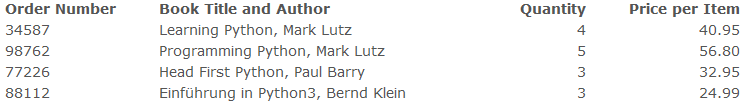

Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el producto del precio por artículo y la cantidad. El producto debe aumentarse en 10, - € si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando las funciones **lambda y map** no se pueden usar ciclos for.

2). La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 
>          orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
>	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
>	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
>          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

Escriba un programa que devuelva una lista de dos tuplas (número de pedido, cantidad total de pedido), usando las funciones **lambda y map** no se pueden usar ciclos for.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>